C:\Users\Tarang verma\AppData\Local\Temp\ipykernel_22900\4160345893.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Training Accuracy', 'Test Accuracy'], y=[accuracy_on_training_data, accuracy_on_test_data], palette='viridis')


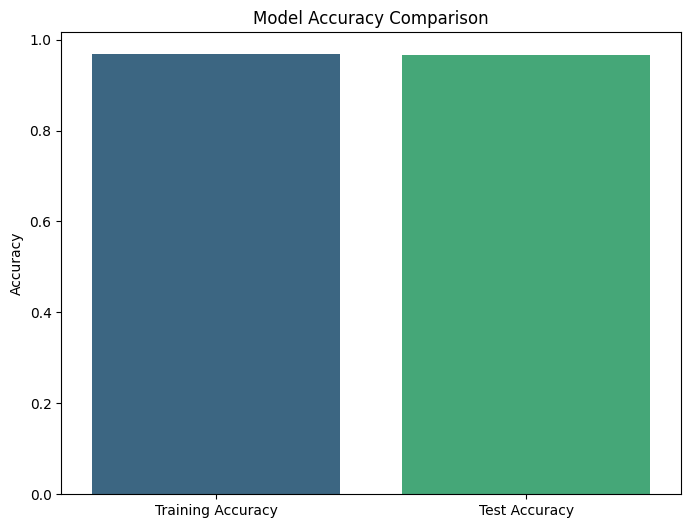

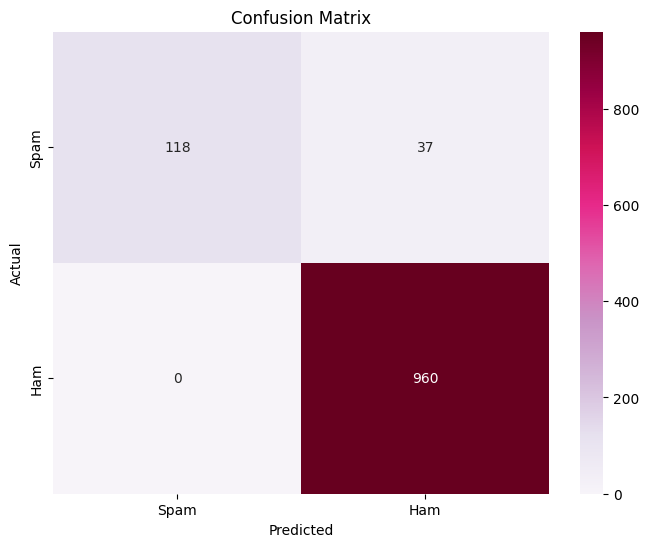

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.76      0.86       155
           1       0.96      1.00      0.98       960

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
raw_mail_data = pd.read_csv(r'D:\CodeHub\SPAM EMail Detection\mail_data.csv')

# Data Pre-processing
mail_data = raw_mail_data.where((pd.notnull(raw_mail_data)), '')

# Assuming you have a 'Category' column in your dataset
mail_data['Category'] = mail_data['Category'].map({'spam': 0, 'ham': 1})

X = mail_data['Message']
Y = mail_data['Category']

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

# Feature Extraction
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)

# Apply feature extraction to X_train
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

# Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train_features, Y_train)

# Prediction on test data
prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)

# Convert Y_test to int for compatibility
Y_test = Y_test.astype(int)

# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, prediction_on_test_data)

# Classification Report
class_report = classification_report(Y_test, prediction_on_test_data)
model = LogisticRegression()
model.fit(X_train_features, Y_train)

# Prediction on training data
prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

# Prediction on test data
prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)



# Plotting Accuracy Comparison
plt.figure(figsize=(8, 6))
sns.barplot(x=['Training Accuracy', 'Test Accuracy'], y=[accuracy_on_training_data, accuracy_on_test_data], palette='viridis')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()


# Plotting Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='PuRd', xticklabels=['Spam', 'Ham'], yticklabels=['Spam', 'Ham'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



# Printing Classification Report
print("Classification Report:\n", class_report)